# Data Visualization with Matplotlib using Titanic dataset 

This data set consists Information about the passengers of RMS Titanic ship And also have info about is that particular passenger is survived in that disaster or not. For every individual person we have information about —

-> `**Passenger Id**`- Id number of passenger in data set
<br>
->`Name`- Name of the passenger <br>
->`Survival`- Person survived or not ( 0 for No & 1 for Yes)<br>
->`Pclass`- With what class of ticket that passenger was travelling.<br>
->`sex`- Male Or Female<br>
->`Age`- Age of the person in Years<br>
->`Sibsp`- Number of siblings / spouses on the Titanic<br>
->`parch`- Number of parents / children on the Titanic<br>
->`Ticket`- Ticket number<br>
->`Fare`- Amount of money that person paid to travel<br>
->`Cabin`- Cabin Number of Passenger<br>
->`Embarked`- Port of Embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton)<br>

## 1. Import the libraries
we need to import the libraries required to go furthe. Here is the list of libraries we are using:

   `Numpy` : Multidimensional Array and Matrix Representation Library<br>
   `Pandas` : Python Data Analysis Library for Data Frame, CSV File I/O<br>
   `Matplotlib` : Data Visualization Library<br>
   `Seaborn` : Data Visualization Library built on top of Matplotlib. This gives you a cleaner visualization and easier interface to call.

In [1]:
# data processi
import pandas as pd
# linear algebra
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

## 2. Load the Data
Load the data in a data frame and check how data looks like..
We can use pandas to read **train.csv** from the Titanic Data Page. This code will create a DataFrame Object which is a two dimensional array to optimize data exploration process. Think about it as Excelsheet in Python with rows and columns


In [2]:
df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

## 3. Explore the Data
          
          
`head()` or `tail()`:-
We will start by viewing the very first **few rows** inside the data. 

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### This is how our Data looks like.

**Observations-**

    1. As we can see above the data set has 12 columns or features. we already discussed what these features are all about earlier.
    2. Here the Survived column is the target variable or class label. Target variable is the feature which needs to be predicted by our models.
    3. We have numerical , categorical Type of features

## 3. info()
Fetch some info about data by .info().<br>
The `info` helps you figure out the data types and the existence of empty values. 

In [4]:
print("Shape of data is :",df.shape)
df.info()

Shape of data is : (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

###### **Observations-**  
Here, we found out that the columns Age, Cabin, and Embarked possess missing value.

    1. Shape of data is **(891,12)** means in our data set we have 891 rows and 12 columns. Each row has info about a passenger so totally we have data of 891 passengers.
    2. In above output , column consist the name of the column , Non-null Count means How many non-null values we have in that column , Dtype means What type of value that column consits ( int64 means int value , float64 means float value, object means string value)
    3. In age column we can see, Out of 891 values we have 714 non null values. It implies that we have 177 Null values. ( 891–714 = 177)
    4. Same in the Cabin feature Out of 891 values we have only 204 non-null values. it implies that we have 687 Null values. But this is Huge . we have only 23% of values present in data set and 77% values are missing so we can drop this feature while making our model.
    

###### 4. Fetch some info about numerical features by .describe()
`describe()`:

The describe will help you get all the statistical description of numerical columns. If you write the include parameter as object, it would describe the non-numerical columns. This is very useful method to grab a quick understanding on the data statistically.

In [5]:
#Describe() to explore Titanic Data
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Leonard, Mr. Lionel",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


###### From this description, we can find the following thoughts:

-The mean and the distribution of the variables.<br>
-Most passengers bought the tickets for relatively lower price. But, a few bought at high cost — indicating possible VIPs.<br>
-The Parch distribution is highly skewed as the quartiles indicate 0 and the max indicates 6. This means that most people do not bring parents or children on board and a few parents bring up to 6 children and parents on board.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the data-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.


###### Observations-

1. Here some features are not necessary like passengerId. so we will ignore that. Only features which can be consider as numerical and need to analysis as numerical features are Age & Fare.
2. In Age feature = 714, it means for 714 persons we have age value, else are missing. We have Mean as 29.69 , It means The mean age of all the passengers is 29.69 Years. Std (stander deviation ) as 14.52 It means most of the people have age in the range (29.69-14.52) to (29.69+14.52) because in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). The min age as 0.42 in above image so It means out of all passengers we have 0.4 years old as the minimum age of any passenger. And We have 25% value(25th Percentile value) as 20.12 years It means 25% of passengers have Age less than 20.12 years. same we have 50%value (50th percentile value) as 28.00 It Means 50% of the passengers have age less than 28.00 years. same as 75% value (75th percentile value) we have as 38.00 It means 75% people has Age less than 38.00 years. Max value we can see as 80.00 years It Means out of all passengers the Highest aged person has age 80.00 Years
3. Same like Age feature Analysis , you can analyze Fare feature.

###### 5. Get info about balanced or imbalanced data set.

In [7]:
# Replacing 1 as yes and 0 as no.
df["Survived"]=df["Survived"].map({1:'yes', 0:'no'})
df["Survived"].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

Observations-

    We can see out of 891 passengers , 549 can not survived in that disaster And 342 Survived. So the data we have can not be said as imbalanced. neither it is perfectly balanced . it is like ok ok situation.

Since we have done the `basic Analysis` now lets go towards `visual analysis`.<br>
First we will do `bi-variate Analysis` then do `uni-variate analysis`.

### Bi-variate Analysis-

    Pair plots are the most widely used plots to perform visualization bi-variate analysis. But the problem with pair plot is if we have n features in dataset then it returns n*n plots. in current data set we have 12 features now so it will return 12*12= 144 plots which is again not easy to analyze. so we will take only a subset of features and analyze them.

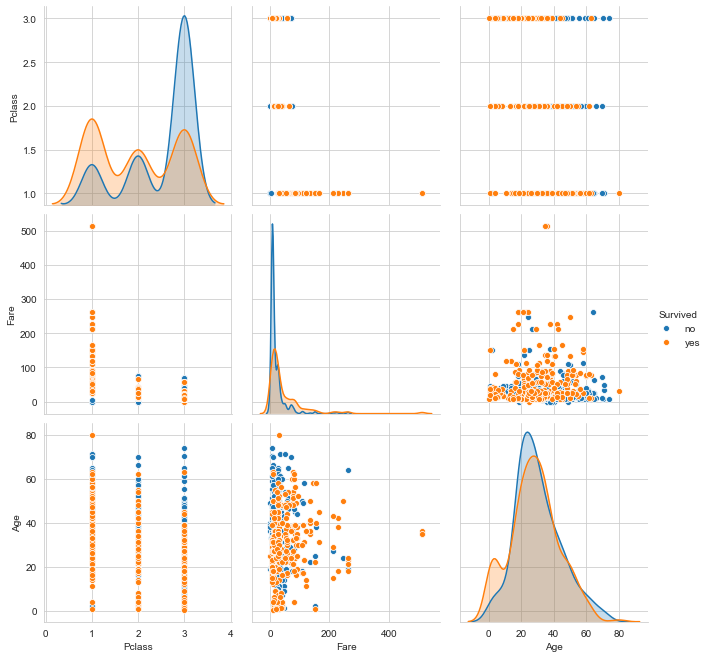

In [8]:
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(df[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

**Observations-**

   - From the above grid of plots we can see that, passengers who paid higher fare or travelling in upper class has a higher chances to survive.
   - Age is also giving some info like young persons have a higher chance to survive than old peoples.
   - The picture is not very clear with pair plots so lets go towards uni-variate analysis to understand what exactly is happening.

### Uni-variate Analysis

##### 1.Survived Feature

<AxesSubplot:xlabel='Survived', ylabel='count'>

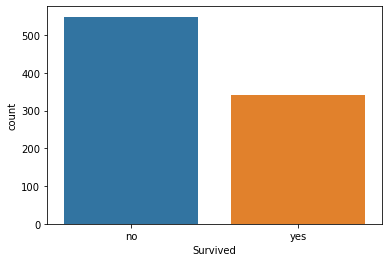

In [8]:
# Countplot counts the each category of value and plot that.
sns.countplot(df["Survived"],data = df)

**Observations-**

    As we can see ‘no’ has the value > 500 means these people can’t survived in the disaster & approx 350 people survived. It is telling same story like we have seen above.

#### 2. Pclass- Feature

<AxesSubplot:xlabel='Pclass', ylabel='count'>

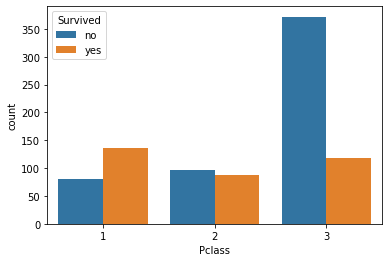

In [9]:
sns.countplot(df["Pclass"],hue = df["Survived"],data = df)

**Observations-**
   - I have heard or read some where there is not any value of poor people lives. Same concept is applying here. In above output plot we can see Persons who were travelling in 3rd class , mostly of them died or can not survived than other class passengers.
- Persons who were travelling in 2nd class, out of them almost equal number of people died and survived.<br>
- Persons who were travelling in 1st class, out of them large number of people survived and also fair number of persons died.
- So as the conclusion we can say that person who were travelling in lower class like 3rd has higher chances to died. & persons who were travelling in higher class like 1st has higher chance to survive.

#### 3.Sex- Feature

<AxesSubplot:xlabel='Sex', ylabel='count'>

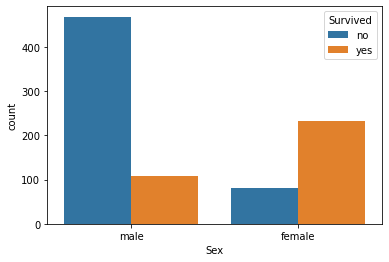

In [10]:
sns.countplot(df["Sex"],hue = df["Survived"],data = df)
#sns.countplot(df["Sex"],hue = df['Sex'],data = df)

###### **Observstions-**
  -As we can see in above plot Out of all male passengers mostly of them died. And out of all Female passengers most of them survived.
  
  -So as the conclusion we can say male passenger has higher chances to die and female passengers has higher chance to survive. Or Because of Ladies First policy , priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.

### 5. Sibsp Feature

<AxesSubplot:xlabel='SibSp', ylabel='count'>

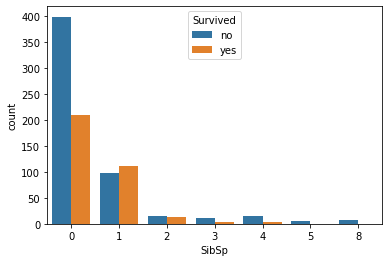

In [11]:
sns.countplot(df["SibSp"],hue = df["Survived"],data = df)

###### Observations-
- Passengers who have 0 siblings mostly of them died.
- Passengers with 1 sibling has equally chance for both die and survive.
- But wait its interesting. passengers who have higher number of siblings like 3 , 4 , 5, 8 has a very low chance to survive or almost 0% chance to survive. But it should be high right.. because if I were on the titanic and have 4 , 5 or 8 siblings on titanic then chances of my survival should be high right. But sadly in hard times people thinks only for themselves not for others.

### 6.Parch Feature

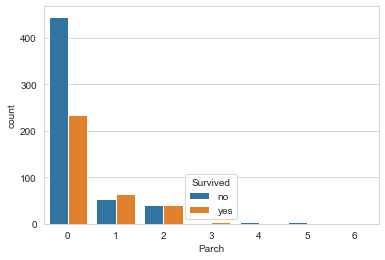

In [13]:
sns.countplot(df["Parch"],hue = df["Survived"],data = df)

###### Observations-

- like sibsp almost Same theory is applying here. Analyze it by yourself.

### 7. Fare feature

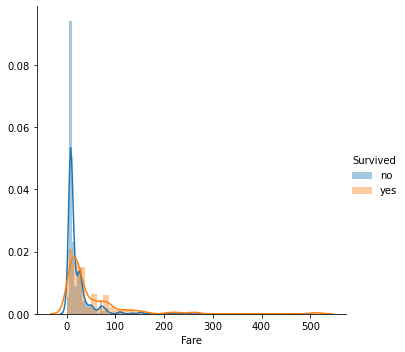

In [12]:
sns.FacetGrid(df, hue = "Survived", size=5) \
 .map(sns.distplot, 'Fare') \
 .add_legend();
plt.show();

###### Observations-

 - Passengers who paid low fair has a higher chances to die. On the other hand passengers who paid high fair has a higher chance to survive.This observation is same like pclass persons who were rich has higher chance to survive and poor lower chance to survive.

### 8. Embarked Feature

<AxesSubplot:xlabel='Embarked', ylabel='count'>

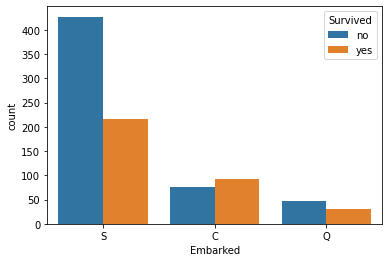

In [13]:
sns.countplot(df["Embarked"],hue = df["Survived"],data = df)

###### Observations-

- Passengers who started his journey from Southampton , most of them died.
- There is not any much difference in peoples surviving or die chances who started his journey from Cherbourg , Queenstown .

######    4. Age-Feature-

- Age feature consist some null values so first we need to handle that. Here i am filling the null values with median of Age Feature. we know that the median of Age feature is 28.
- Age is a numerical feature so we can’t plot a count plot for Age feature. we need to plot pdf for Age Feature.

In [70]:
# Filling null Values
#df = df.fillna(28)# plotting Pdfs
#sns.FacetGrid(data, hue="Survived", size=5) \
#   .map(sns.distplot, "Age") \
#   .add_legend()
# plt.show()

###### Observations-

- Pdfs are almost overlapping on each other. so we can not conclude anything big clearly. but some of the conclusions are listed bellow.
- Passengers who have age <20 years so child's or teenagers , out of them numbers of passengers who survived is greater than numbers of people who died. Means while Rescuing priorities were given to child's or teenagers.
- Persons who have age >20 years and <45 years. Out of them numbers of passengers who died is greater than numbers of passengers who survived.
- Rest of the pdfs are overlapping much so we will not struggle here much to get some info. But people with age greater then 65 almost all of them died. it could be because of various reasons like people leave them on their luck or they died because of cold water of Atlantic Ocean of that time.. etc..

###### Some Important things here to know.

  The Data set we have consists 12 features But we are doing uni-variate analysis only on 8 features because rest 4 features are useless os not give much information to us. for e.g feature **PassengerId** and **Passenger name**,**tickets** these to features are not useful for prediction so its better to drop theme from dataset. And in the **cabin** data set we have 77% null values so it is not trivial to handle cabin feature that’s why i am drooping these 4 features from my data set.

In [69]:
# You can drop those 4 features from data set with this code.
#data = data.drop(["PassengerId", "Name" , "Ticket" , "Cabin"],axis = 1)
#data.head()

Now the question comes in mind is that do we need to perform uni-variate analysis on every individual feature of the data set. how can it possible to perform uni-variate analysis on all features individually if we have a large dimensional data set. Well i think ans is no , we don’t need to perform uni-variate analysis on individual feature in a large dimensional data set. That will be too costly and time taking. in that case you can perform bi-variate analysis or take a set of columns and train a model only on that set of features and see if that is giving good result then definitely those features are useful to predict class label else not.. like these you can try many hacks to analyze.

So That’s all folks.. Based on the above analysis we come up with some nice facts about the Titanic disaster. As mentioned in the title this blog is mostly for Beginners so i tried to use simple lines of code so a beginner can understand easily. if you know even basic machine learning techniques like Knn , logistic-regression etc… so with these techniques and the above analysis you can build your simple machine learning model which can predict either a passenger survived or not based on the information about passenger given.

The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

###### Let’s take a more detailed look at what data is actually missing:

In [17]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [14]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

###### Above you can see the 11 features + the target variable (survived). What features could contribute to a high survival rate ?

To me it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

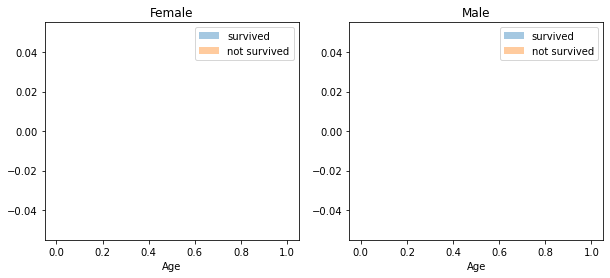

In [15]:
#Age and Sex:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']

men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived,ax = axes[0],kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_=ax.set_title('Male')


- You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

- For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

- Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

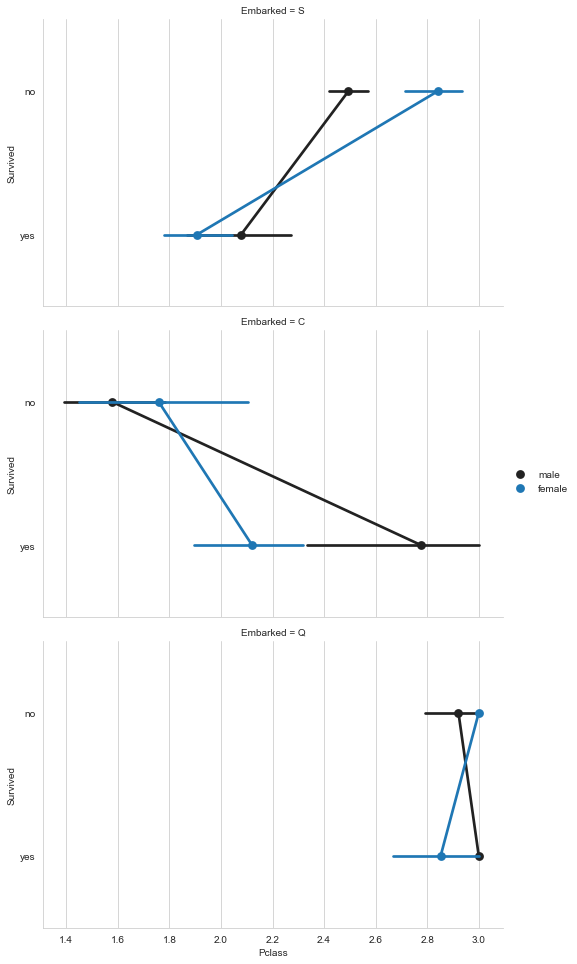

In [19]:
#Embarked, Pclass and Sex:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

- Embarked seems to be correlated with survival, depending on the gender.

- Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

- Pclass also seems to be correlated with survival. We will generate another plot of it below.

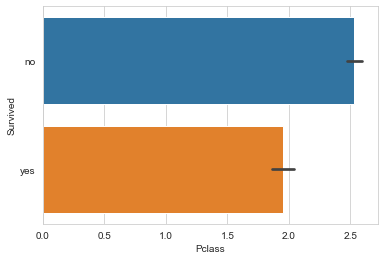

In [21]:
#Pclass:
sns.barplot(x='Pclass', y='Survived', data=df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

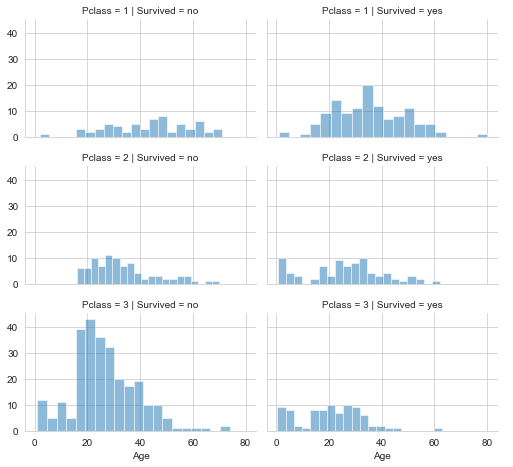

In [22]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

### 5. SibSp and Parch:

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [23]:
data = [df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

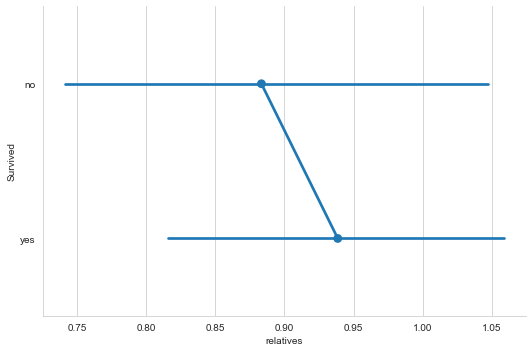

In [24]:
axes = sns.factorplot('relatives','Survived',data=df, aspect = 1.5, )

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

## Data Preprocessing

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set, since it is required there for the submission.

In [25]:
train_df = df.drop(['PassengerId','Cabin'], axis=1)
train_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,no,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1
887,yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1
888,no,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,0
889,yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1


### Missing Data:

##### Cabin:
As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought, we have to delete the ‘Cabin’ variable but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero. In the picture below you can see the actual decks of the titanic, ranging from A to G.

#### Handle missing values in Age

There are several ways to replace the missing values in Age Column:

- Not recommended: Replace by the mean of ages. This is not a good approach, as you could see that most of the passengers are located among 20–30 years old where the oldest is 80 years old and the youngest is 0.42 years old (infant).
- Recommended: Replace by the median of ages. This would be a better approach as this would safely allocate our missing values to 20–30 years old which are comfortably the inside interquartile ranges.
- Most Recommended: Replace the ages according to the median by each salutation. This would be the best approach as the salutation will imply the common ages among the imputed data (e.g: Sir, Mdm, etc).

**Conclusion:** Let us take the third approach. In case if you do not know what lambda is, you could think of it as an inline function. This makes the code much simpler to read.

or

Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.


    

In [26]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    #compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [46]:
#df['Salutation'] = df.Name.apply(lambda name: group = df.groupby(['Salutation', 'Pclass'])
#                                 group.Age.apply(lambda x: x.fillna(x.median())
#df.Age.fillna(df.Age.median, inplace = True)
#df.groupby(['Salutation', 'Pclass'])

In [27]:
#Embarked:

#Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [28]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

## Converting Features:

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    object 
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 76.7+ KB


Above you can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Lets investigate and transfrom one after another.

#### Fare:
Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [30]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

#### Name:
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [31]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [32]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Title
0,no,3,male,22,1,0,A/5 21171,7,S,1,0,1
1,yes,1,female,38,1,0,PC 17599,71,C,1,0,3
2,yes,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,2
3,yes,1,female,35,1,0,113803,53,S,1,0,3
4,no,3,male,35,0,0,373450,8,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,no,2,male,27,0,0,211536,13,S,0,1,5
887,yes,1,female,19,0,0,112053,30,S,0,1,2
888,no,3,female,28,1,2,W./C. 6607,23,S,3,0,2
889,yes,1,male,26,0,0,111369,30,C,0,1,1


#### Sex:
Convert ‘Sex’ feature into numeric.

In [33]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

Ticket:

In [34]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [35]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

#### Embarked:
Convert ‘Embarked’ feature into numeric.

In [36]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Creating Categories:

We will now create categories within the following features:

##### Age:
Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1.

In [38]:
data = [train_df, test_df]


In [53]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7
    train_df['Age'].value_counts()
# let's see how it's distributed 
train_df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class
0,no,3,0,0,1,0,7,0,1,0,1,6
1,yes,1,1,0,1,0,71,1,1,0,3,5
2,yes,3,1,0,0,0,7,0,0,1,2,9
3,yes,1,1,0,1,0,53,0,1,0,3,5
4,no,3,0,0,0,0,8,0,0,1,1,15
5,no,3,0,0,0,0,8,2,0,1,1,3
6,no,1,0,0,0,0,51,0,0,1,1,6
7,no,3,0,0,3,1,21,0,4,0,4,0
8,yes,3,1,0,0,2,11,0,2,0,3,9
9,yes,2,1,0,1,0,30,1,1,0,3,2


In [41]:
train_df['Age'].value_counts()

6    154
4    154
5    153
3    134
2    119
1    102
0     68
7      7
Name: Age, dtype: int64

### Creating new Features

I will add two new features to the dataset, that I compute out of other features.

###### 1. Age times Class

In [42]:
#data = [train_df, test_df]
#for dataset in data:
 #   dataset['Age_Class']= dataset['Age']* dataset['Pclass']

## Building Machine Learning Models

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [48]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class
0,no,3,0,2,1,0,7,0,1,0,1,6
1,yes,1,1,5,1,0,71,1,1,0,3,5
2,yes,3,1,3,0,0,7,0,0,1,2,9
3,yes,1,1,5,1,0,53,0,1,0,3,5
4,no,3,0,5,0,0,8,0,0,1,1,15
5,no,3,0,1,0,0,8,2,0,1,1,3
6,no,1,0,6,0,0,51,0,0,1,1,6
7,no,3,0,0,3,1,21,0,4,0,4,0
8,yes,3,1,3,0,2,11,0,2,0,3,9
9,yes,2,1,1,1,0,30,1,1,0,3,2


In [49]:
X_train.head(15)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class
0,3,0,2,1,0,7,0,1,0,1,6
1,1,1,5,1,0,71,1,1,0,3,5
2,3,1,3,0,0,7,0,0,1,2,9
3,1,1,5,1,0,53,0,1,0,3,5
4,3,0,5,0,0,8,0,0,1,1,15
5,3,0,1,0,0,8,2,0,1,1,3
6,1,0,6,0,0,51,0,0,1,1,6
7,3,0,0,3,1,21,0,4,0,4,0
8,3,1,3,0,2,11,0,2,0,3,9
9,2,1,1,1,0,30,1,1,0,3,2


### Stochastic Gradient Descent (SGD):